In [1]:
import pandas as pd
import missingno as msno
ruta_dataset = "ejercicio_Missing_Values.xlsx"
df= pd.read_excel(ruta_dataset)
df

,Nombre,Apellido 1,Apellido 2,Sexo,Municipio,Provincia,NIF,Edad,Estatura,Masa,Hijos,Ingresos,Estado Civil,Vacunadx,CARNÉ CONDUCIR,Consumidorx Alcohol Esporádico,REFERENCIA ESTUDIO
0,José,Maza,Redondo,H,Madrid,Madrid,61025400Y,22.0,156.0,60.0,NO,1000.0,Solter/x,SI,SÍ,SÍ,4411125322A
1,Ana Belén,Carrasco,Dimitrova,M,Zaragoza,Zaragoza,73534066F,22.0,160.0,65.0,NO,1200.0,Solter/x,SI,NaN,NaN,4411125322A
2,Pablo,Gálvez,González,H,Talavera de la Reina,Toledo,10223810K,23.0,177.0,70.0,NO,1325.0,Casad/x,SI,SÍ,SÍ,4411125322A
3,María,Gallego,Martínez,M,Sevilla,Sevilla,32770305C,45.0,172.0,89.0,NO,1500.0,Solter/x,No,NO,SÍ,4411125322A
4,José Luis,Fernández,Ortega,H,Oviedo,Asturias,04614346V,37.0,179.0,82.0,SÍ,1662.5,Solter/x,No,NO,SÍ,4411125322A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,Juan Manuel,Sendra,Rubio,H,Valencia,Valencia,39455398W,1.0,78.0,10.0,SÍ,NaN,NaN,NO,NO,NaN,4411125322A
65,Ángel,Castro,Guisado,H,Torrejón de Ardoz,Madrid,33261507M,2.0,86.0,NaN,NaN,NaN,NaN,NaN,NO,NaN,NaN
66,Antonio,Elizalde,Martin,H,Colmenar Viejo,Madrid,39455398W,8.0,125.0,25.0,NO,0.0,Solter/x,SI,NO,NaN,4411125322A
67,Ángel,Guerrero,Alonso,H,Puertollano,Ciudad Real,60423158L,9.0,135.0,30.0,SÍ,0.0,Solter/x,SI,NO,NaN,NaN


Analizo someramente los datos

In [2]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Nombre                          67 non-null     object 
 1   Apellido 1                      67 non-null     object 
 2   Apellido 2                      67 non-null     object 
 3   Sexo                            67 non-null     object 
 4   Municipio                       64 non-null     object 
 5   Provincia                       65 non-null     object 
 6   NIF                             58 non-null     object 
 7   Edad                            67 non-null     float64
 8   Estatura                        57 non-null     float64
 9   Masa                            56 non-null     float64
 10  Hijos                           63 non-null     object 
 11  Ingresos                        62 non-null     float64
 12  Estado Civil                    61 non

In [3]:
df.isnull().sum()

Nombre                             2
Apellido 1                         2
Apellido 2                         2
Sexo                               2
Municipio                          5
Provincia                          4
NIF                               11
Edad                               2
Estatura                          12
Masa                              13
Hijos                              6
Ingresos                           7
Estado Civil                       8
Vacunadx                           5
CARNÉ CONDUCIR                    10
Consumidorx Alcohol Esporádico    43
REFERENCIA ESTUDIO                 5
dtype: int64

<AxesSubplot:>

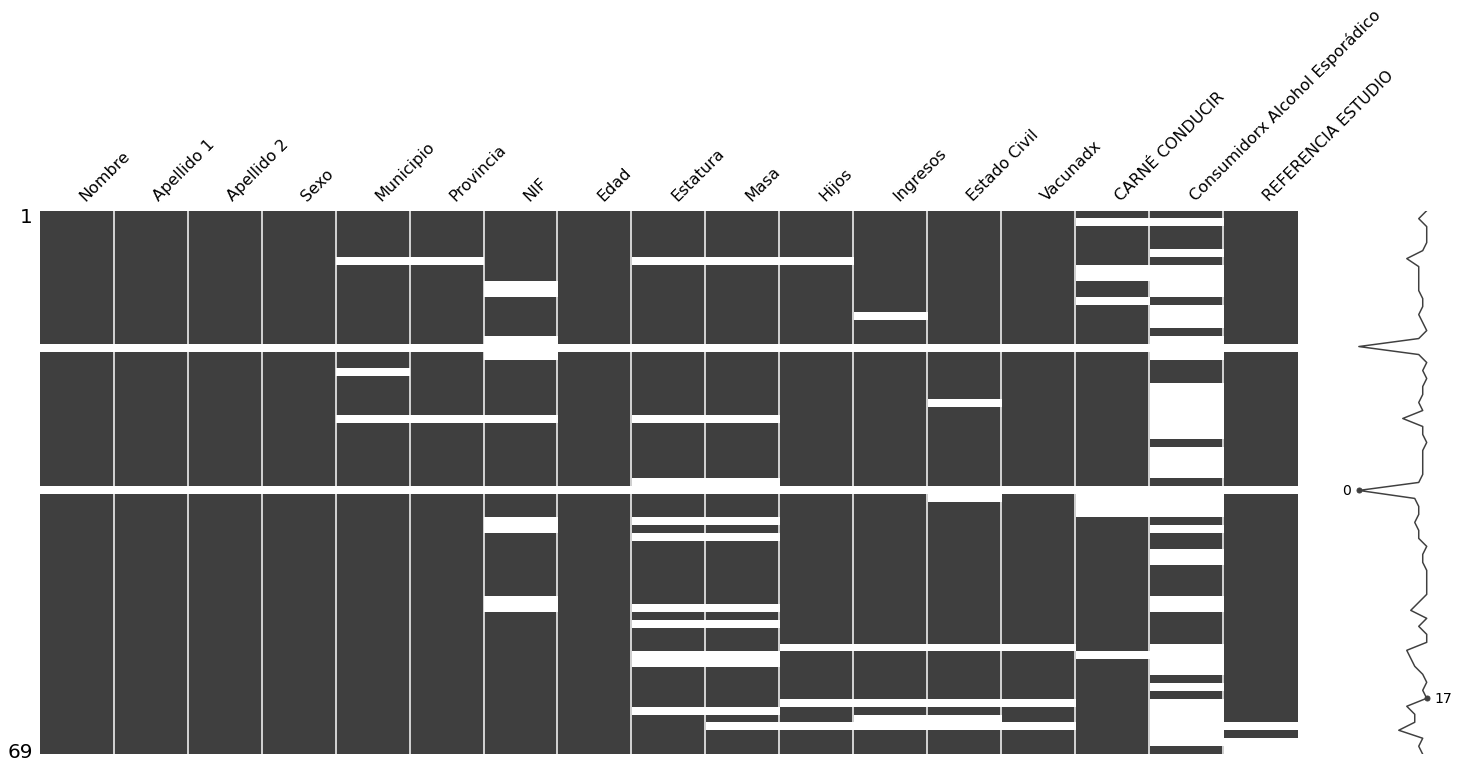

In [4]:
#msno.matrix(df,figsize=(8,5), fontsize=12); #en blanco, cada missing value
msno.matrix(df)

# busco missing values en "bebedor esporádico" y los relleno como NO

<AxesSubplot:>

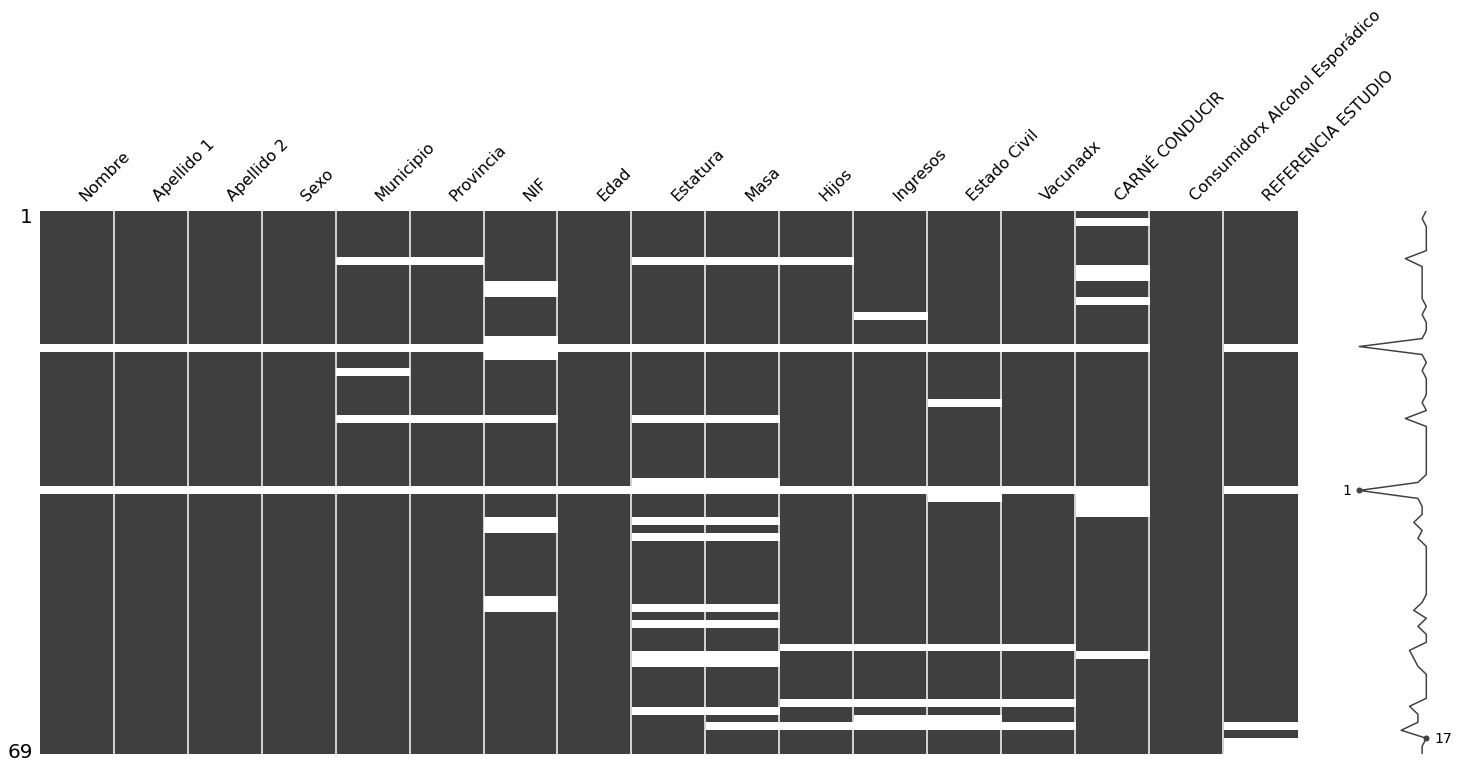

In [5]:
df["Consumidorx Alcohol Esporádico"] = df["Consumidorx Alcohol Esporádico"].fillna("NO")

msno.matrix(df)


# Busco menores de 12 años y les pongo ingresos 0


In [6]:
#condicion = (pd.isnull(df["Número Ventas"])) & (df["Género"]=="Biografías")
#df.loc[condicion, "Número Ventas" ] = df[df["Género"] == "Biografías"]["Número Ventas"].median()


#df["Edad"]<=12
#df[df["Edad"]<=12]
#df[df["Edad"]<=12].Ingresos 

condicion = df["Edad"]<=12
df.loc [condicion,"Ingresos"] = 0

df[df["Edad"]<=12]

,Nombre,Apellido 1,Apellido 2,Sexo,Municipio,Provincia,NIF,Edad,Estatura,Masa,Hijos,Ingresos,Estado Civil,Vacunadx,CARNÉ CONDUCIR,Consumidorx Alcohol Esporádico,REFERENCIA ESTUDIO
9,Jesús,López,Núñez,H,Cartagena,Murcia,NaN,2.0,88.0,13.0,NO,0.0,Solter/x,SI,NO,NO,4411125322A
16,José,López,Doncel,H,San Vicente del Raspeig,Alicante,NaN,5.0,110.0,18.0,NO,0.0,Solter/x,No,NO,NO,4411125322A
22,Carlos,Jurado,Pérez,H,Madrid,Madrid,06708146N,3.0,92.0,14.0,SÍ,0.0,Solter/x,No,NO,NO,4411125322A
23,Ángeles,Orgaz,Frías,M,Palma de Mallorca,Islas Baleares,55261507M,6.0,118.0,21.0,NO,0.0,Solter/x,No,NO,NO,4411125322A
24,Sara,Flórez,Álvarez,M,Madrid,Madrid,44415288N,4.0,101.0,14.5,NO,0.0,NaN,No,NO,NO,4411125322A
25,Rocío,Manzano,Márquez,M,Úbeda,Jaén,72588830W,7.0,123.0,25.0,NO,0.0,Solter/x,No,NO,NO,4411125322A
33,María Isabel,Jurado,Gómez,M,Baracaldo,Vizcaya,76939156Q,11.0,145.0,56.0,NO,0.0,Solter/x,No,NO,NO,4411125322A
36,Josefa,Ferrer,Salado,M,Olesa de Montserrat,Barcelona,39455398W,6.0,112.0,20.0,SÍ,0.0,NaN,SI,NaN,NO,4411125322A
37,Cristina,Acosta,Mateo,M,Oviedo,Asturias,06708146N,4.0,104.0,16.8,NO,0.0,Solter/x,No,NaN,NO,4411125322A
38,Ana,Peña,Sánchez,M,Cabra,Córdoba,55261507M,7.0,122.0,28.0,NO,0.0,Solter/x,No,NaN,NO,4411125322A


# Puede un niño estar casado con menos de 16 años??

relleno lo NaN con "Solter/x"

In [7]:
df[df["Edad"]<=16]

,Nombre,Apellido 1,Apellido 2,Sexo,Municipio,Provincia,NIF,Edad,Estatura,Masa,Hijos,Ingresos,Estado Civil,Vacunadx,CARNÉ CONDUCIR,Consumidorx Alcohol Esporádico,REFERENCIA ESTUDIO
9,Jesús,López,Núñez,H,Cartagena,Murcia,NaN,2.0,88.0,13.0,NO,0.0,Solter/x,SI,NO,NO,4411125322A
16,José,López,Doncel,H,San Vicente del Raspeig,Alicante,NaN,5.0,110.0,18.0,NO,0.0,Solter/x,No,NO,NO,4411125322A
22,Carlos,Jurado,Pérez,H,Madrid,Madrid,06708146N,3.0,92.0,14.0,SÍ,0.0,Solter/x,No,NO,NO,4411125322A
23,Ángeles,Orgaz,Frías,M,Palma de Mallorca,Islas Baleares,55261507M,6.0,118.0,21.0,NO,0.0,Solter/x,No,NO,NO,4411125322A
24,Sara,Flórez,Álvarez,M,Madrid,Madrid,44415288N,4.0,101.0,14.5,NO,0.0,NaN,No,NO,NO,4411125322A
25,Rocío,Manzano,Márquez,M,Úbeda,Jaén,72588830W,7.0,123.0,25.0,NO,0.0,Solter/x,No,NO,NO,4411125322A
31,Ane,Fontán,Barros,M,Bilbao,Vizcaya,06708146N,15.0,150.0,50.0,SÍ,1993.6,Solter/x,No,NO,NO,4411125322A
32,Manu,Rodríguez,Casado,H,Santa Cruz de Tenerife,S.C. de Tenerife,55261507M,13.0,151.0,51.0,SÍ,980.0,Solter/x,No,NO,NO,4411125322A
33,María Isabel,Jurado,Gómez,M,Baracaldo,Vizcaya,76939156Q,11.0,145.0,56.0,NO,0.0,Solter/x,No,NO,NO,4411125322A
36,Josefa,Ferrer,Salado,M,Olesa de Montserrat,Barcelona,39455398W,6.0,112.0,20.0,SÍ,0.0,NaN,SI,NaN,NO,4411125322A


,Nombre,Apellido 1,Apellido 2,Sexo,Municipio,Provincia,NIF,Edad,Estatura,Masa,Hijos,Ingresos,Estado Civil,Vacunadx,CARNÉ CONDUCIR,Consumidorx Alcohol Esporádico,REFERENCIA ESTUDIO
33,María Isabel,Jurado,Gómez,M,Baracaldo,Vizcaya,76939156Q,11.0,145.0,56.0,NO,0.000000,Solter/x,No,NO,NO,4411125322A
51,María Carmen,Carmona,Rodríguez,M,Estepona,Málaga,19322774Z,36.0,179.0,79.0,NO,1945.200000,Solter/x,SI,SÍ,SÍ,4411125322A
37,Cristina,Acosta,Mateo,M,Oviedo,Asturias,06708146N,4.0,104.0,16.8,NO,0.000000,Solter/x,No,NaN,NO,4411125322A
6,Rosa,Cano,Gómez,M,NaN,NaN,39455398W,55.0,NaN,NaN,NaN,2100.000000,Divorciad/x,No,SÍ,SÍ,4411125322A
14,Cristina,Valbuena,Sánchez,M,San Fernando,Cádiz,46708146N,56.0,180.0,82.0,NO,505.000000,Solter/x,No,SÍ,NO,4411125322A
42,Encarnación,Gallardo,Panadero,M,Valladolid,Valladolid,41355613A,20.0,165.0,72.0,SÍ,680.571429,Solter/x,No,SÍ,SÍ,4411125322A
7,Sebastián,Caparros,Sánchez,H,Madrid,Madrid,06708146N,78.0,165.0,66.0,SÍ,2150.000000,Divorciad/x,No,NaN,NO,4411125322A
23,Ángeles,Orgaz,Frías,M,Palma de Mallorca,Islas Baleares,55261507M,6.0,118.0,21.0,NO,0.000000,Solter/x,No,NO,NO,4411125322A
13,José Luis,Romero,Busto,H,San Sebastián,Guipúzcoa,79455398W,45.0,171.0,60.0,SÍ,NaN,Solter/x,No,SÍ,NO,4411125322A
5,Manuel,García,Muñoz,H,Madrid,Madrid,81971380R,59.0,188.0,122.0,SÍ,1825.000000,Divorciad/x,No,NO,NO,4411125322A


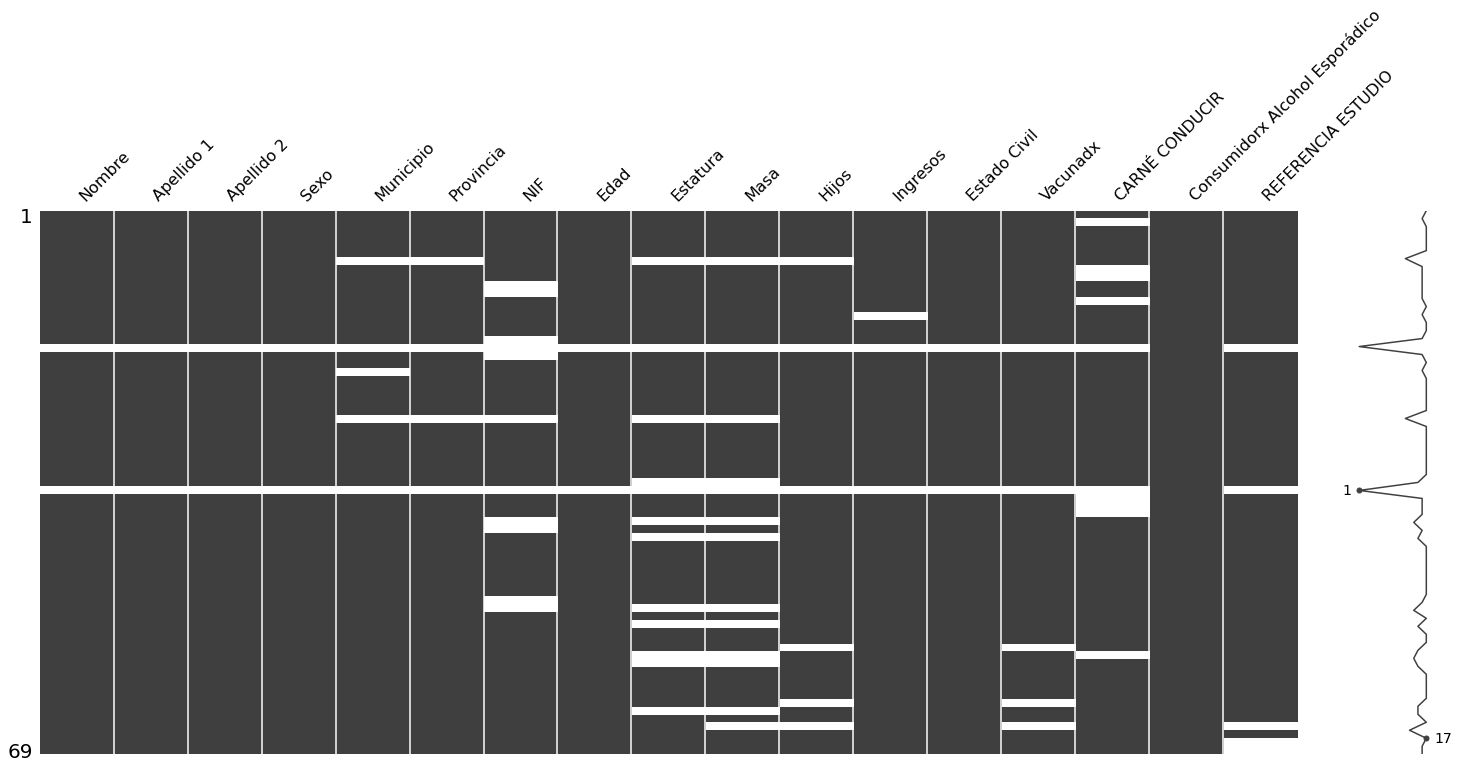

In [8]:
#df["Consumidorx Alcohol Esporádico"] = df["Consumidorx Alcohol Esporádico"].fillna("NO")
#df["Estado Civil"] = [df["Edad"]<=16].fillna("Solter/x")
#condicion = (pd.isnull(df["Número Ventas"])) & (df["Género"]=="Biografías")
#condicion = df["Edad"]<=12
#df.loc [condicion,"Ingresos"] = 0

df[df["Edad"]<=16]
df[df["Estado Civil"].isnull()]

condicion = (pd.isnull(df["Estado Civil"])) & (df["Edad"]<=16)
df.loc [condicion,"Estado Civil"] = "Solter/x"

df[df["Edad"]<=16]

msno.matrix(df)

df.sample (50)


In [19]:
df[df["Hijos"].isnull()]

,Nombre,Apellido 1,Apellido 2,Sexo,Municipio,Provincia,NIF,Edad,Estatura,Masa,Hijos,Ingresos,Estado Civil,Vacunadx,CARNÉ CONDUCIR,Consumidorx Alcohol Esporádico,REFERENCIA ESTUDIO
6,Rosa,Cano,Gómez,M,NaN,NaN,39455398W,55.0,NaN,NaN,NaN,2100.0,Divorciad/x,No,SÍ,SÍ,4411125322A
17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,NaN
35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,NaN
55,María Carmen,Ordoñez,Ortega,M,Madrid,Madrid,33614346V,3.0,90.0,15.0,NaN,0.0,Solter/x,NaN,NO,NO,4411125322A
62,María Carmen,Romano,Abellán,M,Irun,Guipúzcoa,39455398W,3.0,94.0,14.7,NaN,0.0,Solter/x,NaN,NO,NO,4411125322A
65,Ángel,Castro,Guisado,H,Torrejón de Ardoz,Madrid,33261507M,2.0,86.0,NaN,NaN,0.0,Solter/x,NaN,NO,NO,NaN


In [10]:
#funcion que itera sobre las columnas y lista sus valores
for index in range(df.shape[1]):
    print('Índice de la columna: ', index)
    print('Contenido de la columna: ', df.iloc[: , index].values)

Índice de la columna:  0
Contenido de la columna:  ['José' 'Ana Belén' 'Pablo' 'María' 'José Luis' 'Manuel' 'Rosa'
 'Sebastián' 'Antonio' 'Jesús' 'Juan' 'Jordi' 'Antonio' 'José Luis'
 'Cristina' 'Sara' 'José' nan 'Alejandro' 'Juan' 'Concepción' 'María'
 'Carlos' 'Ángeles' 'Sara' 'Rocío' 'María Teresa' 'Encarnación'
 'María Carmen' 'Rafael' 'María Teresa' 'Ane' 'Manu' 'María Isabel'
 'Emilio' nan 'Josefa' 'Cristina' 'Ana' 'Manuel' 'José Antonio' 'Iñigo'
 'Encarnación' 'Francisco' 'Sara' 'Juan' 'Emilia' 'Manuela' 'Manuel'
 'Pilar' 'Carmen' 'María Carmen' 'Sergio' 'Manuela' 'Lucia' 'María Carmen'
 'Susana' 'Beatriz' 'Asunción' 'José María' 'Antonio' 'Francisco Javier'
 'María Carmen' 'María' 'Juan Manuel' 'Ángel' 'Antonio' 'Ángel'
 'María Teresa']
Índice de la columna:  1
Contenido de la columna:  ['Maza' 'Carrasco' 'Gálvez' 'Gallego' 'Fernández' 'García' 'Cano'
 'Caparros' 'Morante' 'López' 'Sanz' 'Martínez' 'López' 'Romero'
 'Valbuena' 'Pérez' 'López' nan 'León' 'Cabeza' 'Cobos' 'Díaz' 

In [11]:
#acceder a una columna concreta
#df[df.columns[2]]
#df[df.columns[-2:]]
Unicos = df[df.columns[2]].unique()
num = len (Unicos)
num

59

In [12]:
for index in range(df.shape[1]):
    print('Índice de la columna: ', index)
    print('Contenido de la columna: ', df.iloc[: , index].values)
    print('valores unicos', df[df.columns[index]].unique())
    print('nº valores unicos', len(df[df.columns[index]].unique()))
    

Índice de la columna:  0
Contenido de la columna:  ['José' 'Ana Belén' 'Pablo' 'María' 'José Luis' 'Manuel' 'Rosa'
 'Sebastián' 'Antonio' 'Jesús' 'Juan' 'Jordi' 'Antonio' 'José Luis'
 'Cristina' 'Sara' 'José' nan 'Alejandro' 'Juan' 'Concepción' 'María'
 'Carlos' 'Ángeles' 'Sara' 'Rocío' 'María Teresa' 'Encarnación'
 'María Carmen' 'Rafael' 'María Teresa' 'Ane' 'Manu' 'María Isabel'
 'Emilio' nan 'Josefa' 'Cristina' 'Ana' 'Manuel' 'José Antonio' 'Iñigo'
 'Encarnación' 'Francisco' 'Sara' 'Juan' 'Emilia' 'Manuela' 'Manuel'
 'Pilar' 'Carmen' 'María Carmen' 'Sergio' 'Manuela' 'Lucia' 'María Carmen'
 'Susana' 'Beatriz' 'Asunción' 'José María' 'Antonio' 'Francisco Javier'
 'María Carmen' 'María' 'Juan Manuel' 'Ángel' 'Antonio' 'Ángel'
 'María Teresa']
valores unicos ['José' 'Ana Belén' 'Pablo' 'María' 'José Luis' 'Manuel' 'Rosa'
 'Sebastián' 'Antonio' 'Jesús' 'Juan' 'Jordi' 'Cristina' 'Sara' nan
 'Alejandro' 'Concepción' 'Carlos' 'Ángeles' 'Rocío' 'María Teresa'
 'Encarnación' 'María Carmen' 

In [13]:
for index in range(df.shape[1]):
    print('Índice de la columna: ', index)    
    print('nº valores unicos', len(df[df.columns[index]].unique()))

Índice de la columna:  0
nº valores unicos 46
Índice de la columna:  1
nº valores unicos 55
Índice de la columna:  2
nº valores unicos 59
Índice de la columna:  3
nº valores unicos 4
Índice de la columna:  4
nº valores unicos 49
Índice de la columna:  5
nº valores unicos 26
Índice de la columna:  6
nº valores unicos 31
Índice de la columna:  7
nº valores unicos 35
Índice de la columna:  8
nº valores unicos 36
Índice de la columna:  9
nº valores unicos 35
Índice de la columna:  10
nº valores unicos 3
Índice de la columna:  11
nº valores unicos 39
Índice de la columna:  12
nº valores unicos 4
Índice de la columna:  13
nº valores unicos 4
Índice de la columna:  14
nº valores unicos 3
Índice de la columna:  15
nº valores unicos 2
Índice de la columna:  16
nº valores unicos 2


In [14]:
for column in df:
    print('Nombre de la columna: ', column)        
    print('Contenido de la columna: ', df[column].values)
    print('Valores Unicos: ', df[column].unique())
    print('nº de Valores Unicos: ', len(df[column].unique()))
    

Nombre de la columna:  Nombre
Contenido de la columna:  ['José' 'Ana Belén' 'Pablo' 'María' 'José Luis' 'Manuel' 'Rosa'
 'Sebastián' 'Antonio' 'Jesús' 'Juan' 'Jordi' 'Antonio' 'José Luis'
 'Cristina' 'Sara' 'José' nan 'Alejandro' 'Juan' 'Concepción' 'María'
 'Carlos' 'Ángeles' 'Sara' 'Rocío' 'María Teresa' 'Encarnación'
 'María Carmen' 'Rafael' 'María Teresa' 'Ane' 'Manu' 'María Isabel'
 'Emilio' nan 'Josefa' 'Cristina' 'Ana' 'Manuel' 'José Antonio' 'Iñigo'
 'Encarnación' 'Francisco' 'Sara' 'Juan' 'Emilia' 'Manuela' 'Manuel'
 'Pilar' 'Carmen' 'María Carmen' 'Sergio' 'Manuela' 'Lucia' 'María Carmen'
 'Susana' 'Beatriz' 'Asunción' 'José María' 'Antonio' 'Francisco Javier'
 'María Carmen' 'María' 'Juan Manuel' 'Ángel' 'Antonio' 'Ángel'
 'María Teresa']
Valores Unicos:  ['José' 'Ana Belén' 'Pablo' 'María' 'José Luis' 'Manuel' 'Rosa'
 'Sebastián' 'Antonio' 'Jesús' 'Juan' 'Jordi' 'Cristina' 'Sara' nan
 'Alejandro' 'Concepción' 'Carlos' 'Ángeles' 'Rocío' 'María Teresa'
 'Encarnación' 'María C

In [15]:
for column in df:
    #print('Nombre de la columna: ', column)            
    #print('nº de Valores Unicos: ', len(df[column].unique()))
    print('Nombre de la columna: ', column, '    nº de Valores Unicos: ', len(df[column].unique()))

Nombre de la columna:  Nombre     nº de Valores Unicos:  46
Nombre de la columna:  Apellido 1     nº de Valores Unicos:  55
Nombre de la columna:  Apellido 2     nº de Valores Unicos:  59
Nombre de la columna:  Sexo     nº de Valores Unicos:  4
Nombre de la columna:  Municipio     nº de Valores Unicos:  49
Nombre de la columna:  Provincia     nº de Valores Unicos:  26
Nombre de la columna:  NIF     nº de Valores Unicos:  31
Nombre de la columna:  Edad     nº de Valores Unicos:  35
Nombre de la columna:  Estatura     nº de Valores Unicos:  36
Nombre de la columna:  Masa     nº de Valores Unicos:  35
Nombre de la columna:  Hijos     nº de Valores Unicos:  3
Nombre de la columna:  Ingresos     nº de Valores Unicos:  39
Nombre de la columna:  Estado Civil     nº de Valores Unicos:  4
Nombre de la columna:  Vacunadx     nº de Valores Unicos:  4
Nombre de la columna:  CARNÉ CONDUCIR     nº de Valores Unicos:  3
Nombre de la columna:  Consumidorx Alcohol Esporádico     nº de Valores Unicos:  

# Graficar estatura media por rangos de edad (de 10 en 10) y género

(array([ 1.,  0.,  0.,  2.,  6.,  5.,  2., 10., 24.,  7.]),
 array([ 13. ,  31.6,  50.2,  68.8,  87.4, 106. , 124.6, 143.2, 161.8,
        180.4, 199. ]),
 <BarContainer object of 10 artists>)

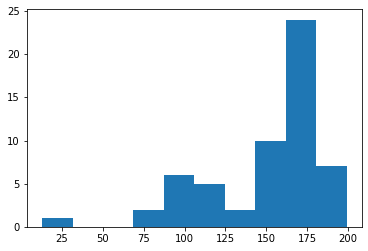

In [16]:
import matplotlib.pyplot as plt
plt.hist (df["Estatura"])

<AxesSubplot:>

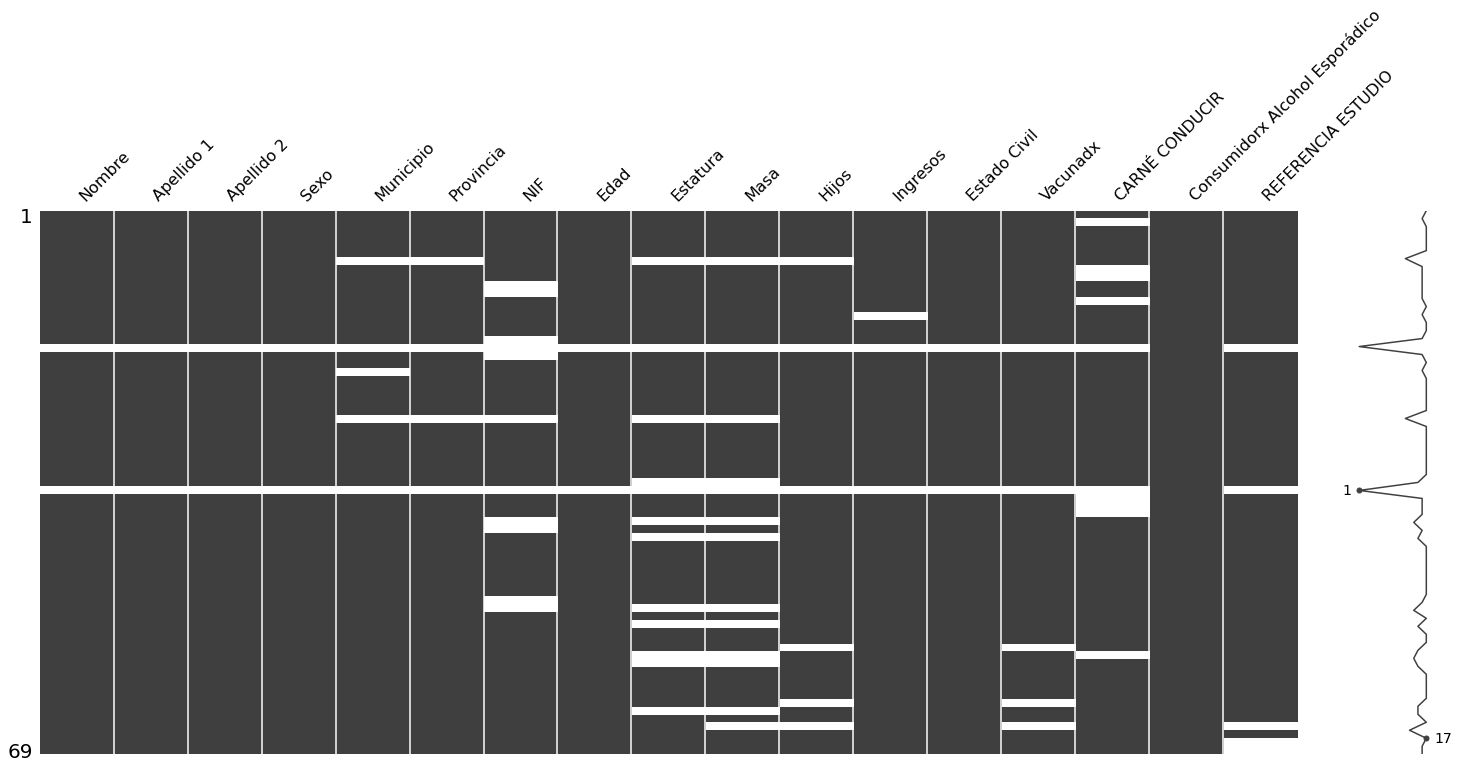

In [17]:
msno.matrix(df)


In [27]:
medians=df.median()
print("medians of Each Column:")
print(medians)

median=df.iloc[[0]].median(axis=1)
print("median of 1st Row:")
print(median)

#Saltar los NaN
median=df.median(skipna=True)
print("medians of Each Row (Saltando NaN):")
print(median)

#Saltar los NaN
median=df["Edad]"].median(skipna=True)
print("medians of Edad (Saltando NaN):")
print(median)



C:\Users\GARCOLCA\AppData\Local\Temp\ipykernel_12008\2539837559.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  medians=df.median()
C:\Users\GARCOLCA\AppData\Local\Temp\ipykernel_12008\2539837559.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  median=df.iloc[[0]].median(axis=1)
C:\Users\GARCOLCA\AppData\Local\Temp\ipykernel_12008\2539837559.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  median=df.median(skipna=True)


medians of Each Column:
Edad          23.0
Estatura     163.0
Masa          66.0
Ingresos    1100.0
dtype: float64
median of 1st Row:
0    108.0
dtype: float64
medians of Each Row (Saltando NaN):
Edad          23.0
Estatura     163.0
Masa          66.0
Ingresos    1100.0
dtype: float64


KeyError: 'Edad]'

In [29]:
#Saltar los NaN
#mediana de una sola columna
median=df["Edad"].median(skipna=True)
print("medians of Edad (Saltando NaN):")
print(median)

medians of Edad (Saltando NaN):
23.0


(array([3., 5., 1., 2., 1., 2., 1., 2., 2.]),
 array([12, 13, 14, 15, 16, 17, 18, 19, 20, 21]),
 <BarContainer object of 9 artists>)

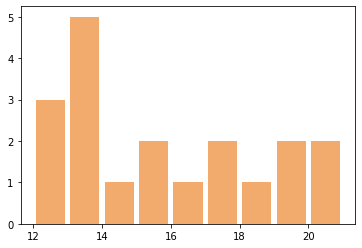

In [32]:
edades = [12, 15, 13, 12, 18, 20, 19, 20, 13, 12, 13, 17, 15, 16, 13, 14, 13, 17, 19]

intervalos = range(min(edades), max(edades) + 2)
plt.hist(x=edades, bins=intervalos, color='#F2AB6D', rwidth=0.85)



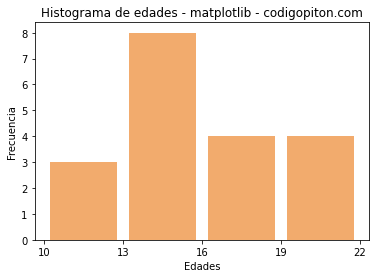

In [33]:
import matplotlib.pyplot as plot

edades = [12, 15, 13, 12, 18, 20, 19, 20, 13, 12, 13, 17, 15, 16, 13, 14, 13, 17, 19]

intervalos = [10, 13, 16, 19, 22] #indicamos los extremos de los intervalos

plt.hist(x=edades, bins=intervalos, color='#F2AB6D', rwidth=0.85,)
plt.title('Histograma de edades - matplotlib - codigopiton.com')
plt.xlabel('Edades')
plt.ylabel('Frecuencia')
plt.xticks(intervalos)

plt.show() #dibujamos el histograma

([<matplotlib.axis.XTick at 0x2423e80efd0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

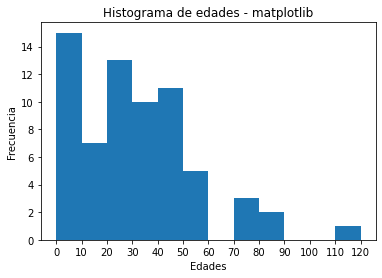

In [42]:
intervalos = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120]
#plt.hist (df["Edad"])
plt.hist (df["Edad"], bins = intervalos)
plt.title('Histograma de edades - matplotlib')
plt.xlabel('Edades')
plt.ylabel('Frecuencia')
plt.xticks(intervalos)


<AxesSubplot:xlabel='Edad', ylabel='count'>

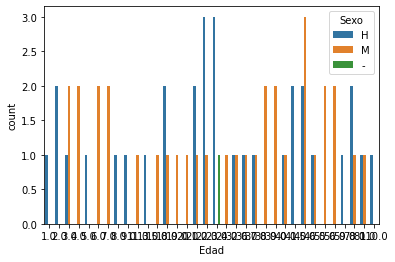

In [50]:
import seaborn as sns


sns.countplot (x=df["Edad"], hue =df ["Sexo"] )